In [13]:
#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fileName = 'oneMinWs_withInterp.txt' # 'oneMinWs.txt' 
fileName_wo = 'oneMinWs_woInterp.txt' # 'oneMinWs.txt' 

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"


In [3]:
#%% Extract time series of 1-min maximum wind speed
# Files with interpolation at z = 10m
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',')
file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',')
file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',')
file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',')

# Files without interpolation at z = 10m
file_26_wo = np.loadtxt(WRF_DIRECTORY_26+fileName_wo,delimiter=',')
file_28_wo = np.loadtxt(WRF_DIRECTORY_28+fileName_wo,delimiter=',')
file_30_wo = np.loadtxt(WRF_DIRECTORY_30+fileName_wo,delimiter=',')
file_32_wo = np.loadtxt(WRF_DIRECTORY_32+fileName_wo,delimiter=',')
file_34_wo = np.loadtxt(WRF_DIRECTORY_34+fileName_wo,delimiter=',')


In [4]:
#%% Variables
# Files with interpolation at z = 10m
time_26 = file_26[:,0]
ws_26 = file_26[:,1]

time_28 = file_28[:,0]
ws_28 = file_28[:,1]

time_30 = file_30[:,0]
ws_30 = file_30[:,1]

time_32 = file_32[:,0]
ws_32 = file_32[:,1]

# Files without interpolation at z = 10m
time_26_wo = file_26_wo[:,0]
ws_26_wo = file_26_wo[:,1]

time_28_wo = file_28_wo[:,0]
ws_28_wo = file_28_wo[:,1]

time_30_wo = file_30_wo[:,0]
ws_30_wo = file_30_wo[:,1]

time_32_wo = file_32_wo[:,0]
ws_32_wo = file_32_wo[:,1]

time_34_wo = file_34_wo[:,0]
ws_34_wo = file_34_wo[:,1]

In [5]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'

In [6]:
#%% Hurricane eyewall
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


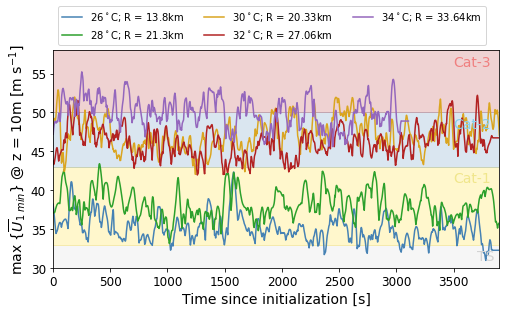

In [7]:
#%% Figure of max winds for all atmospheric conditions

# Limits
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30),np.max(time_32)])]
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30)])]
limX = [0,np.max(time_32)]

limY = [30,58]

mpyplot.figure(figsize=(8,4))
# With interpolation
mpyplot.plot(time_26_wo,ws_26_wo,label=r'26$^\circ$C; R = '+str(np.round(r_eye_26/1000,2))+'km',color=col_26)
mpyplot.plot(time_28_wo,ws_28_wo,label=r'28$^\circ$C; R = '+str(np.round(r_eye_28/1000,2))+'km',color=col_28)
mpyplot.plot(time_30_wo,ws_30_wo,label=r'30$^\circ$C; R = '+str(np.round(r_eye_30/1000,2))+'km',color=col_30)
mpyplot.plot(time_32_wo,ws_32_wo,label=r'32$^\circ$C; R = '+str(np.round(r_eye_32/1000,2))+'km',color=col_32)
mpyplot.plot(time_34_wo,ws_34_wo,label=r'34$^\circ$C; R = '+str(np.round(r_eye_34/1000,2))+'km',color=col_34)
# Without interpolation
# mpyplot.plot(time_26,ws_26,color='steelblue',linestyle='--')
# mpyplot.plot(time_28,ws_28,color='tab:green',linestyle='--')
# mpyplot.plot(time_30,ws_30,color='goldenrod',linestyle='--')
# mpyplot.plot(time_32,ws_32,color='firebrick',linestyle='--')

mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[18,18,32.999,32.999],alpha=0.2,color='lightgrey')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[33,33,42.999,42.999],alpha=0.2,color='gold')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[43,43,49.999,49.999],alpha=0.2,color='steelblue')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[50,50,58,58],alpha=0.2,color='firebrick')
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(limY[:])
mpyplot.xlim(limX[:])
mpyplot.text(3500,56,'Cat-3',fontsize=14,color='lightcoral')
mpyplot.text(3500,48,'Cat-2',fontsize=14,color='skyblue')
mpyplot.text(3500,41,'Cat-1',fontsize=14,color='khaki')
mpyplot.text(3700,31,'TS',fontsize=14,color='lightgray')
# mpyplot.legend(loc=3,ncol=2)
# mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.05])
mpyplot.legend(loc=3,ncol=3,bbox_to_anchor=[0.0, 1])
mpyplot.xlabel('Time since initialization [s]',fontsize=14)
mpyplot.ylabel(r'max {$\overline{U}_{1\ min}$} @ z = 10m [m s$^{-1}$]',fontsize=14)
mpyplot.savefig(dirFig + "ws_cat_def.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

In [8]:
print(np.mean(ws_26_wo))
print(np.mean(ws_28_wo))
print(np.mean(ws_30_wo))
print(np.mean(ws_32_wo))
print(np.mean(ws_34_wo))

35.03996359361334
38.067729492789475
47.26160468728839
46.1902758239687
50.03551666277407


In [9]:
time_26[1:10]

array([0.    , 0.054 , 0.108 , 0.2196, 0.2196, 0.2736, 0.3276, 0.3276,
       0.3852])

In [10]:
0.054*3

0.162

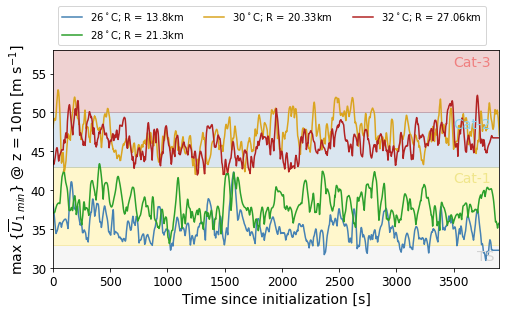

In [11]:
# Limits
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30),np.max(time_32)])]
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30)])]
limX = [0,np.max(time_32)]

limY = [30,58]

mpyplot.figure(figsize=(8,4))
# With interpolation
mpyplot.plot(time_26_wo,ws_26_wo,label=r'26$^\circ$C; R = '+str(np.round(r_eye_26/1000,2))+'km',color=col_26)
mpyplot.plot(time_28_wo,ws_28_wo,label=r'28$^\circ$C; R = '+str(np.round(r_eye_28/1000,2))+'km',color=col_28)
mpyplot.plot(time_30_wo,ws_30_wo,label=r'30$^\circ$C; R = '+str(np.round(r_eye_30/1000,2))+'km',color=col_30)
mpyplot.plot(time_32_wo,ws_32_wo,label=r'32$^\circ$C; R = '+str(np.round(r_eye_32/1000,2))+'km',color=col_32)
# mpyplot.plot(time_34_wo,ws_34_wo,label=r'34$^\circ$C; R = '+str(np.round(r_eye_34/1000,2))+'km',color=col_34)
# Without interpolation
# mpyplot.plot(time_26,ws_26,color='steelblue',linestyle='--')
# mpyplot.plot(time_28,ws_28,color='tab:green',linestyle='--')
# mpyplot.plot(time_30,ws_30,color='goldenrod',linestyle='--')
# mpyplot.plot(time_32,ws_32,color='firebrick',linestyle='--')

mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[18,18,32.999,32.999],alpha=0.2,color='lightgrey')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[33,33,42.999,42.999],alpha=0.2,color='gold')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[43,43,49.999,49.999],alpha=0.2,color='steelblue')
mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[50,50,58,58],alpha=0.2,color='firebrick')
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(limY[:])
mpyplot.xlim(limX[:])
mpyplot.text(3500,56,'Cat-3',fontsize=14,color='lightcoral')
mpyplot.text(3500,48,'Cat-2',fontsize=14,color='skyblue')
mpyplot.text(3500,41,'Cat-1',fontsize=14,color='khaki')
mpyplot.text(3700,31,'TS',fontsize=14,color='lightgray')
# mpyplot.legend(loc=3,ncol=2)
# mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.05])
mpyplot.legend(loc=3,ncol=3,bbox_to_anchor=[0.0, 1])
mpyplot.xlabel('Time since initialization [s]',fontsize=14)
mpyplot.ylabel(r'max {$\overline{U}_{1\ min}$} @ z = 10m [m s$^{-1}$]',fontsize=14)
mpyplot.savefig(dirFig + "ws_cat_def_4.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

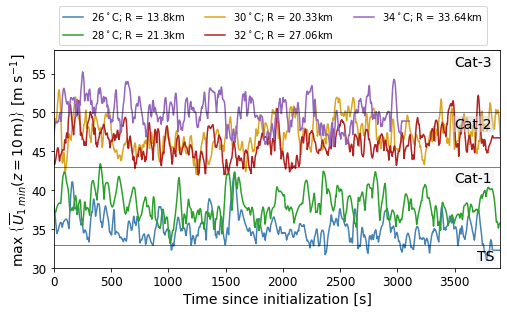

In [36]:
# Limits
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30),np.max(time_32)])]
limX = [0,np.max([np.max(time_26),np.max(time_28),np.max(time_30)])]
limX = [0,np.max(time_32)]

limY = [30,58]

mpyplot.figure(figsize=(8,4))
# With interpolation
mpyplot.plot(time_26_wo,ws_26_wo,label=r'26$^\circ$C; R = '+str(np.round(r_eye_26/1000,2))+'km',color=col_26)
mpyplot.plot(time_28_wo,ws_28_wo,label=r'28$^\circ$C; R = '+str(np.round(r_eye_28/1000,2))+'km',color=col_28)
mpyplot.plot(time_30_wo,ws_30_wo,label=r'30$^\circ$C; R = '+str(np.round(r_eye_30/1000,2))+'km',color=col_30)
mpyplot.plot(time_32_wo,ws_32_wo,label=r'32$^\circ$C; R = '+str(np.round(r_eye_32/1000,2))+'km',color=col_32)
mpyplot.plot(time_34_wo,ws_34_wo,label=r'34$^\circ$C; R = '+str(np.round(r_eye_34/1000,2))+'km',color=col_34)
# Without interpolation
# mpyplot.plot(time_26,ws_26,color='steelblue',linestyle='--')
# mpyplot.plot(time_28,ws_28,color='tab:green',linestyle='--')
# mpyplot.plot(time_30,ws_30,color='goldenrod',linestyle='--')
# mpyplot.plot(time_32,ws_32,color='firebrick',linestyle='--')

mpyplot.plot([limX[0],limX[-1]],[32.999,32.999],color='black',linewidth=0.5)
mpyplot.plot([limX[0],limX[-1]],[42.999,42.999],color='black',linewidth=0.5)
mpyplot.plot([limX[0],limX[-1]],[49.999,49.999],color='black',linewidth=0.5)
mpyplot.plot([limX[0],limX[-1]],[58,58],color='black',linewidth=0.5)
# mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[33,33,42.999,42.999],alpha=0.2,color='gold')
# mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[43,43,49.999,49.999],alpha=0.2,color='steelblue')
# mpyplot.fill([limX[0],limX[-1],limX[-1],limX[0]],[50,50,58,58],alpha=0.2,color='firebrick')
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(limY[:])
mpyplot.xlim(limX[:])
mpyplot.text(3500,56,'Cat-3',fontsize=14,color='black'
            ,bbox=dict(boxstyle="square,pad=0.1",fc="lightgrey", ec="lightgray", lw=0,alpha=0.2))
mpyplot.text(3500,48,'Cat-2',fontsize=14,color='black'
            ,bbox=dict(boxstyle="square,pad=0.1",fc="lightgrey", ec="lightgray", lw=0,alpha=0.5))
# mpyplot.text(3500,41,'Cat-1',fontsize=14,color='black')


mpyplot.text(3500,41,'Cat-1',fontsize=14,color='black'
            ,bbox=dict(boxstyle="square,pad=0.1",fc="lightgrey", ec="lightgray", lw=0,alpha=0.2))
    
    
mpyplot.text(3700,31,'TS',fontsize=14,color='black'
            ,bbox=dict(boxstyle="square,pad=0.1",fc="lightgrey", ec="lightgray", lw=0,alpha=0.2))
# mpyplot.legend(loc=3,ncol=2)
# mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.05])
mpyplot.legend(loc=3,ncol=3,bbox_to_anchor=[0.0, 1])
mpyplot.xlabel('Time since initialization [s]',fontsize=14)
mpyplot.ylabel(r'max $\left\{\overline{U}_{1\ min} (z = \mathrm{10\,m})\right\}$ [m s$^{-1}$]',fontsize=14)
mpyplot.savefig(dirFig + "ws_cat_def_noColor.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')